In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
url = r"https://raw.githubusercontent.com/yakincc/BBVA_PricePrediction_Abehackers/master/dataset_tasacion_train.xlsx"
df = pd.read_excel(url)

geo_df = df[['Latitud (Decimal)', 'Longitud (Decimal)', 'Valor comercial']].copy()
geo_df.columns = ['Latitud', 'Longitud', 'Precio']

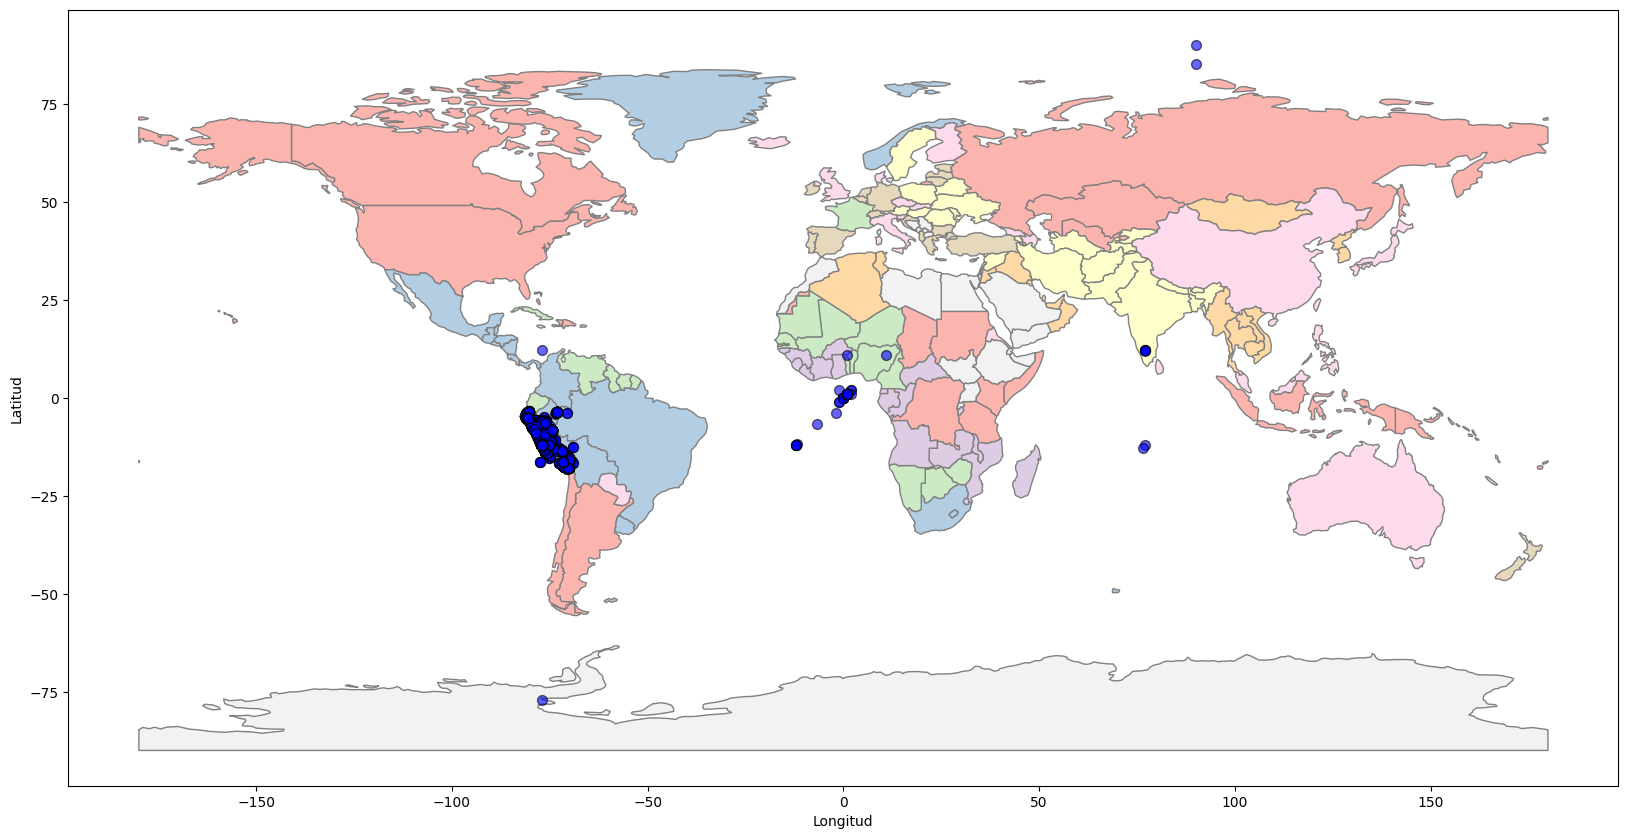

In [3]:
geo_df = geo_df.query('Latitud < 180 & Latitud > -180 & Longitud > -180 & Longitud < 180')
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.head()
ax = countries.plot(figsize=(20,20),edgecolor=u'gray', cmap='Pastel1')
plt.scatter(x=geo_df['Longitud'], y=geo_df['Latitud'], c = 'Blue' , s = 50, alpha = 0.6, edgecolors = 'Black')
plt.ylabel('Latitud')
plt.xlabel('Longitud')
plt.show()

In [4]:
#NaN dropping values
clean_geo_df = geo_df.dropna()
clean_geo_df.reset_index(drop=True)
print(clean_geo_df.describe())

clean_geo_df = clean_geo_df.query('Latitud < -0.03 & Latitud > -18.3522222 & Longitud > -81.32638888888889 & Longitud < -68.6575')
print(clean_geo_df.describe())

            Latitud      Longitud        Precio
count  39608.000000  39608.000000  3.960800e+04
mean     -11.617694    -76.519664  2.272406e+05
std        2.323654      5.571648  3.136548e+05
min      -77.064902    -81.271840  1.000000e+00
25%      -12.118747    -77.060735  9.726600e+04
50%      -12.087596    -77.022414  1.532085e+05
75%      -12.033861    -76.972857  2.628420e+05
max       90.000000     90.000000  2.444672e+07
            Latitud      Longitud        Precio
count  39440.000000  39440.000000  3.944000e+04
mean     -11.672483    -76.859638  2.277697e+05
std        2.030317      1.526053  3.141346e+05
min      -18.146222    -81.271840  1.000000e+00
25%      -12.118881    -77.060735  9.770150e+04
50%      -12.087765    -77.022590  1.535385e+05
75%      -12.037938    -76.973901  2.632770e+05
max       -3.481672    -69.039800  2.444672e+07


<Figure size 12800x9600 with 0 Axes>

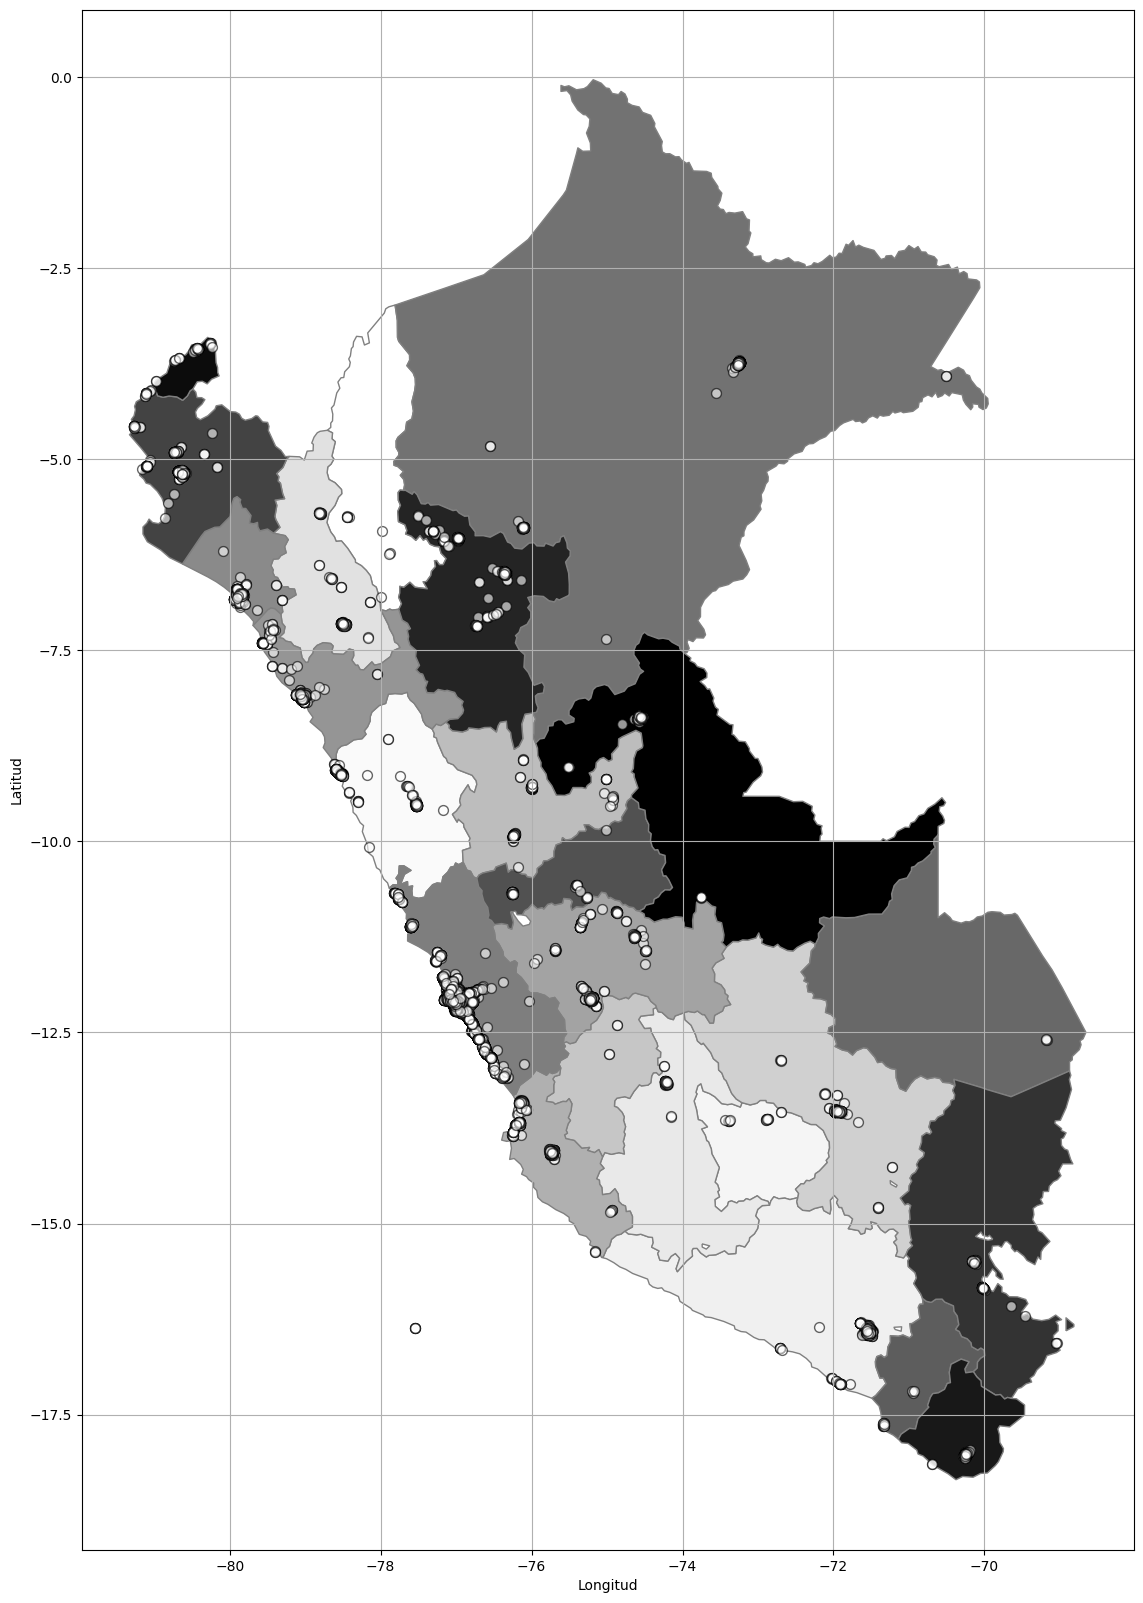

In [5]:

url_geojson = r'https://raw.githubusercontent.com/juaneladio/peru-geojson/master/peru_departamental_simple.geojson'
region_geojson = gpd.read_file(url_geojson)
region_geojson.head()

plt.figure(dpi = 2000)
ax = region_geojson.plot(figsize=(20,20),edgecolor=u'gray', cmap='Greys')
ax.scatter(x=clean_geo_df['Longitud'], y=clean_geo_df['Latitud'], c = 'White', s = 50, alpha = 0.6, edgecolors = 'Black')
plt.ylabel('Latitud')
plt.xlabel('Longitud')
plt.grid(True)
plt.show()
